# Linear Regression
The source code is an implementation for linear regression with gradient descent and normal equation from scratch with python programming language. Measure metrics are MSE, RMSE, and MAE. Also, plotting results is considered as well.

### Note:
This code was written as my Machine Learning course's assignment in the fall of 2021, so it may have some bugs to fix or be coded more optimally.

### GitHub:
https://github.com/MohsenEbadpour

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from math import sqrt
from sklearn.model_selection import train_test_split

pd_DataFrame = pd.read_csv("./dataset1.csv")
X_Total,Y_Total,TotalCount = pd_DataFrame["x"].tolist(), pd_DataFrame["y"],len(pd_DataFrame["x"].tolist())
DEGREES = (5,8,10)
ITERATIONS = (5000,10000)
RESULTS_GDs = []
RESULTS_NEs = []

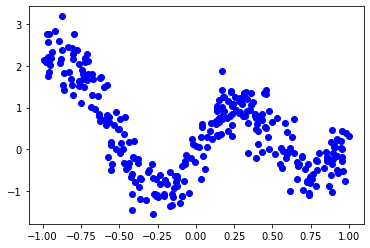

In [2]:
plt.plot(X_Total,Y_Total,'bo') 

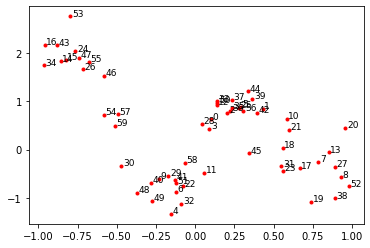

In [3]:
for i in range(60):
    plt.scatter(X_Total[i], Y_Total[i], marker='.', color='red')
    plt.text(X_Total[i]+.01, Y_Total[i]+.01,str(i), fontsize=9)
plt.show()

In [4]:
x_train, x_test, y_train, y_test = map(list,train_test_split(X_Total, Y_Total, test_size=0.33,shuffle=False))

In [5]:
def Hypothesis(X, Theta):
    result = 0
    for degree in range(len(Theta)):
        result += (X**degree)*(Theta[degree])
    return result


def Loss(X,Y,Theta):
    mse_error = 0
    mae_error = 0

    for i in range(len(X)) :
        predict = Hypothesis(X[i],Theta) 
        
        mae_error += abs(predict - Y[i]) 
        mse_error += (predict - Y[i])**2 
        
    mae_error /= len(X)
    mse_error /= len(X)
    
    rmse_error = sqrt(mse_error) 
    return [mae_error,mse_error,rmse_error]

In [6]:
#تابع محاسبه گرادیان نزولی و بروزرسان وزن ها
def GradientDescent(x_train,y_train,x_test,y_test,Degree,Iteration,LearningRate=2.1):
    
    Degree += 1 
    Thetas = [0]*Degree 
    ThetasHistory = []  
    TrainErrorHistory = [] 
    TestErrorHistory = [] 
    LearningRateHistory = [] 
    TotalErrorHistory = [] 

    for ite in range(Iteration):
        Gradients = [0]*Degree 
        
        for deg in range(Degree) : 
            for index in range(len(x_train)): 
                Gradients[deg] += (Hypothesis(x_train[index],Thetas) - y_train[index])*(x_train[index]**deg)
                
            Gradients[deg] /= len(x_train)
            Thetas[deg] = Thetas[deg] - (LearningRate*Gradients[deg]) 
        
        if ite%150 == 75 :
            if Iteration == 5000:
                LearningRate = LearningRate*0.85
            else :
                LearningRate = LearningRate*0.95

        TrainErrorHistory.append(Loss(x_train,y_train,Thetas).copy())
        TestErrorHistory.append(Loss(x_test,y_test,Thetas).copy())
        TotalErrorHistory.append(Loss(x_test+x_train,y_test+y_train,Thetas))
        ThetasHistory.append(Thetas.copy())
        LearningRateHistory.append(LearningRate)
        
    return [Thetas,ThetasHistory,TrainErrorHistory,TestErrorHistory,LearningRateHistory,TotalErrorHistory]
            

In [7]:
RESULTS_GDs.clear()
for degree in DEGREES : 
    for ite in ITERATIONS :
        result_tmp = GradientDescent(x_train,y_train,x_test,y_test,degree,ite)
        result_tmp.insert(0,ite)
        result_tmp.insert(0,degree)
        RESULTS_GDs.append(result_tmp)
        print("Degree with {0} and iteration with {1} completed".format(degree,ite))
        

Degree with 5 and iteration with 5000 completed
Degree with 5 and iteration with 10000 completed
Degree with 8 and iteration with 5000 completed
Degree with 8 and iteration with 10000 completed
Degree with 10 and iteration with 5000 completed
Degree with 10 and iteration with 10000 completed


In [8]:
def ModelGraphByDegree(ite_5000,ite_10000):
    if ite_5000[0] != ite_10000[0] :
        return
    
    plt.rcParams["figure.figsize"] = (10,5)
    plt.plot(X_Total,Y_Total,'yo')
    
    PlottingRange = list(np.arange(-1,1,0.001))
    
    Predicted_5000 = [Hypothesis(tmp,ite_5000[2]) for tmp in PlottingRange]
    Predicted_10000 = [Hypothesis(tmp,ite_10000[2]) for tmp in PlottingRange]

    plt.plot(PlottingRange,Predicted_5000,'b-',label="{0} Iteration".format(ite_5000[1]))
    plt.plot(PlottingRange,Predicted_10000,'r-',label="{0} Iteration".format(ite_10000[1]))
    plt.title("Model Chart - Degree: {0} ".format(ite_10000[0]))
    plt.legend()
    plt.show()

    
def ModelGraphByIteration(deg_5,deg_8,deg_10):
    if deg_5[1] != deg_8[1] or deg_8[1]!=deg_10[1]:
        return
    plt.rcParams["figure.figsize"] = (10,5)
    plt.plot(X_Total,Y_Total,'yo')
    
    PlottingRange = list(np.arange(-1,1,0.001))
    
    Predicted_5 = [Hypothesis(tmp,deg_5[2]) for tmp in PlottingRange]
    Predicted_8 = [Hypothesis(tmp,deg_8[2]) for tmp in PlottingRange]
    Predicted_10 = [Hypothesis(tmp,deg_10[2]) for tmp in PlottingRange]
    
    plt.plot(PlottingRange,Predicted_5,'b-',label="Degree: {0}".format(deg_5[0]))
    plt.plot(PlottingRange,Predicted_8,'r-',label="Degree: {0}".format(deg_8[0]))
    plt.plot(PlottingRange,Predicted_10,'m-',label="Degree: {0}".format(deg_10[0]))
    
    plt.title("Model Chart - Iteration: {0} ".format(deg_5[1]))
    plt.legend()
    plt.show()
   


In [9]:
def ErrorAndLearningRateGraphByDegree(ite_5000,ite_10000):
    if ite_5000[0] != ite_10000[0] :
        return
    I = 1
    plt.rcParams["figure.figsize"] = (30,15)
    for ErrorType in range(3):
        if ErrorType == 0 :
            title = "MAE"
        elif ErrorType == 1 :
            title = "MSE"
        else :
            title = "RMSE"
        
        PlottingRange_5000 = range(len(ite_5000[4]))
        PlottingRange_10000 = range(len(ite_10000[4]))

        TrainError_5000_Train = [ite_5000[4][tmp][ErrorType] for tmp in PlottingRange_5000]
        TrainError_5000_Test = [ite_5000[5][tmp][ErrorType] for tmp in PlottingRange_5000]
        TrainError_5000_Total = [ite_5000[7][tmp][ErrorType] for tmp in PlottingRange_5000]

        TrainError_10000_Train = [ite_10000[4][tmp][ErrorType] for tmp in PlottingRange_10000]
        TrainError_10000_Test = [ite_10000[5][tmp][ErrorType] for tmp in PlottingRange_10000]
        TrainError_10000_Total = [ite_10000[7][tmp][ErrorType] for tmp in PlottingRange_10000]

        PlottingRange_LR_10000 = range(len(ite_10000[6]))
        PlottingRange_LR_5000 = range(len(ite_5000[6]))
        LearningRates_10000 = [ite_10000[6][tmp] for tmp in PlottingRange_LR_10000]
        LearningRates_5000 = [ite_5000[6][tmp] for tmp in PlottingRange_LR_5000]

        
        plt.subplot(3, 4, I)
        plt.plot(PlottingRange_10000,TrainError_10000_Train,'k-',label="{0} Error with Train Data".format(title))
        plt.plot(PlottingRange_10000,TrainError_10000_Test,'r-',label="{0} Error with Test Data".format(title))
        plt.plot(PlottingRange_10000,TrainError_10000_Total,'c--',label="{0} Error with Total Data".format(title))
        plt.plot(PlottingRange_LR_10000,LearningRates_10000,'b-',label="Learning Rate")
        plt.title("{1} Error Chart - Degree: {0} - Iteration: 10000".format(ite_5000[0],title))
        I+=1
        plt.legend()

        plt.subplot(3, 4, I)
        plt.plot(PlottingRange_5000,TrainError_5000_Train,'k-',label="{0} Error with Train Data".format(title))
        plt.plot(PlottingRange_5000,TrainError_5000_Test,'r-',label="{0} Error with Test Data".format(title))
        plt.plot(PlottingRange_5000,TrainError_5000_Total,'c--',label="{0} Error with Total Data".format(title))
        plt.plot(PlottingRange_LR_5000,LearningRates_5000,'b-',label="Learning Rate")
        plt.title("{1} Error Chart - Degree: {0} - Iteration: 5000".format(ite_5000[0],title))
        I+=1
        plt.legend()
        
        plt.subplot(3, 4, I)
        plt.plot(PlottingRange_10000,TrainError_10000_Train,'k-',label="{0} Error with Train Data - Iteration: 10000".format(title))
        plt.plot(PlottingRange_5000,TrainError_5000_Train,'r-',label="{0} Error with Train Data - Iteration: 5000".format(title))
        plt.plot(PlottingRange_10000,TrainError_10000_Test,'m-',label="{0} Error with Test Data - Iteration: 10000".format(title))
        plt.plot(PlottingRange_5000,TrainError_5000_Test,'y-',label="{0} Error with Test Data - Iteration: 5000".format(title))
        plt.plot(PlottingRange_LR_10000,LearningRates_10000,'b-',label="Learning Rate - Iteration 10000 ")
        plt.plot(PlottingRange_LR_5000,LearningRates_5000,'g-',label="Learning Rate - Iteration 5000 ")
        plt.title("{1} Error Chart - Degree: {0}".format(ite_5000[0],title))
        I+=1
        plt.legend()
        
        plt.subplot(3, 4, I)
        plt.plot(PlottingRange_10000,TrainError_10000_Total,'m--',label="{0} Error with Total Data - Iteration: 10000".format(title))
        plt.plot(PlottingRange_5000,TrainError_5000_Total,'y--',label="{0} Error with Total Data - Iteration: 5000".format(title))
        plt.plot(PlottingRange_LR_10000,LearningRates_10000,'b-',label="Learning Rate - Iteration 10000 ")
        plt.plot(PlottingRange_LR_5000,LearningRates_5000,'g-',label="Learning Rate - Iteration 5000 ")
        plt.title("{1} Error Chart Total Data - Degree: {0}".format(ite_5000[0],title))
        I+=1
        plt.legend()
    plt.show()
    

In [10]:
def ErrorGraphByDegreeIteration(deg_5,deg_8,deg_10):
    if deg_5[1] != deg_8[1] or deg_8[1]!=deg_10[1]:
        return
    
    I = 1
    plt.rcParams["figure.figsize"] = (30,15)
    
    for ErrorType in range(3):
        if ErrorType == 0 :
            title = "MAE"
        elif ErrorType == 1 :
            title = "MSE"
        else :
            title = "RMSE"
        
        PlottingRange = range(len(deg_5[4]))
        PlottingRange_LR = range(len(deg_5[6]))
        LearningRates = [deg_5[6][tmp] for tmp in PlottingRange_LR]

        Error_5_Train = [deg_5[4][tmp][ErrorType] for tmp in PlottingRange]
        Error_5_Test = [deg_5[5][tmp][ErrorType] for tmp in PlottingRange]

        Error_8_Train = [deg_8[4][tmp][ErrorType] for tmp in PlottingRange]
        Error_8_Test = [deg_8[5][tmp][ErrorType] for tmp in PlottingRange]    

        Error_10_Train = [deg_10[4][tmp][ErrorType] for tmp in PlottingRange]
        Error_10_Test = [deg_10[5][tmp][ErrorType] for tmp in PlottingRange]

        plt.subplot(3, 3, I)
        plt.plot(PlottingRange,Error_5_Train,'k-',label="5 Degree".format(title))
        plt.plot(PlottingRange,Error_8_Train,'r-',label="8 Degree".format(title))
        plt.plot(PlottingRange,Error_10_Train,'y-',label="10 Degree".format(title))
        plt.plot(PlottingRange_LR,LearningRates,'g-',label="Learning Rate")
        plt.title("{0} Error Chart - with Train Data Iteration: {1}".format(title,deg_5[1]))
        I+=1
        plt.legend()
        
        plt.subplot(3, 3, I)
        plt.plot(PlottingRange,Error_5_Train,'k-',label="5 Degree".format(title))
        plt.plot(PlottingRange,Error_8_Train,'r-',label="8 Degree".format(title))
        plt.plot(PlottingRange,Error_10_Train,'y-',label="10 Degree".format(title))
        plt.title("{0} Error Chart - with Train Data Iteration: {1}".format(title,deg_5[1]))
        I+=1
        plt.legend()
        
        plt.subplot(3, 3, I)
        plt.plot(PlottingRange,Error_5_Test,'k-',label="5 Degree".format(title))
        plt.plot(PlottingRange,Error_8_Test,'r-',label="8 Degree".format(title))
        plt.plot(PlottingRange,Error_10_Test,'y-',label="10 Degree".format(title))
        plt.title("{0} Error Chart with Test Data - Iteration: {1}".format(title,deg_5[1]))
        I+=1
        plt.legend()
        
    plt.show()

    

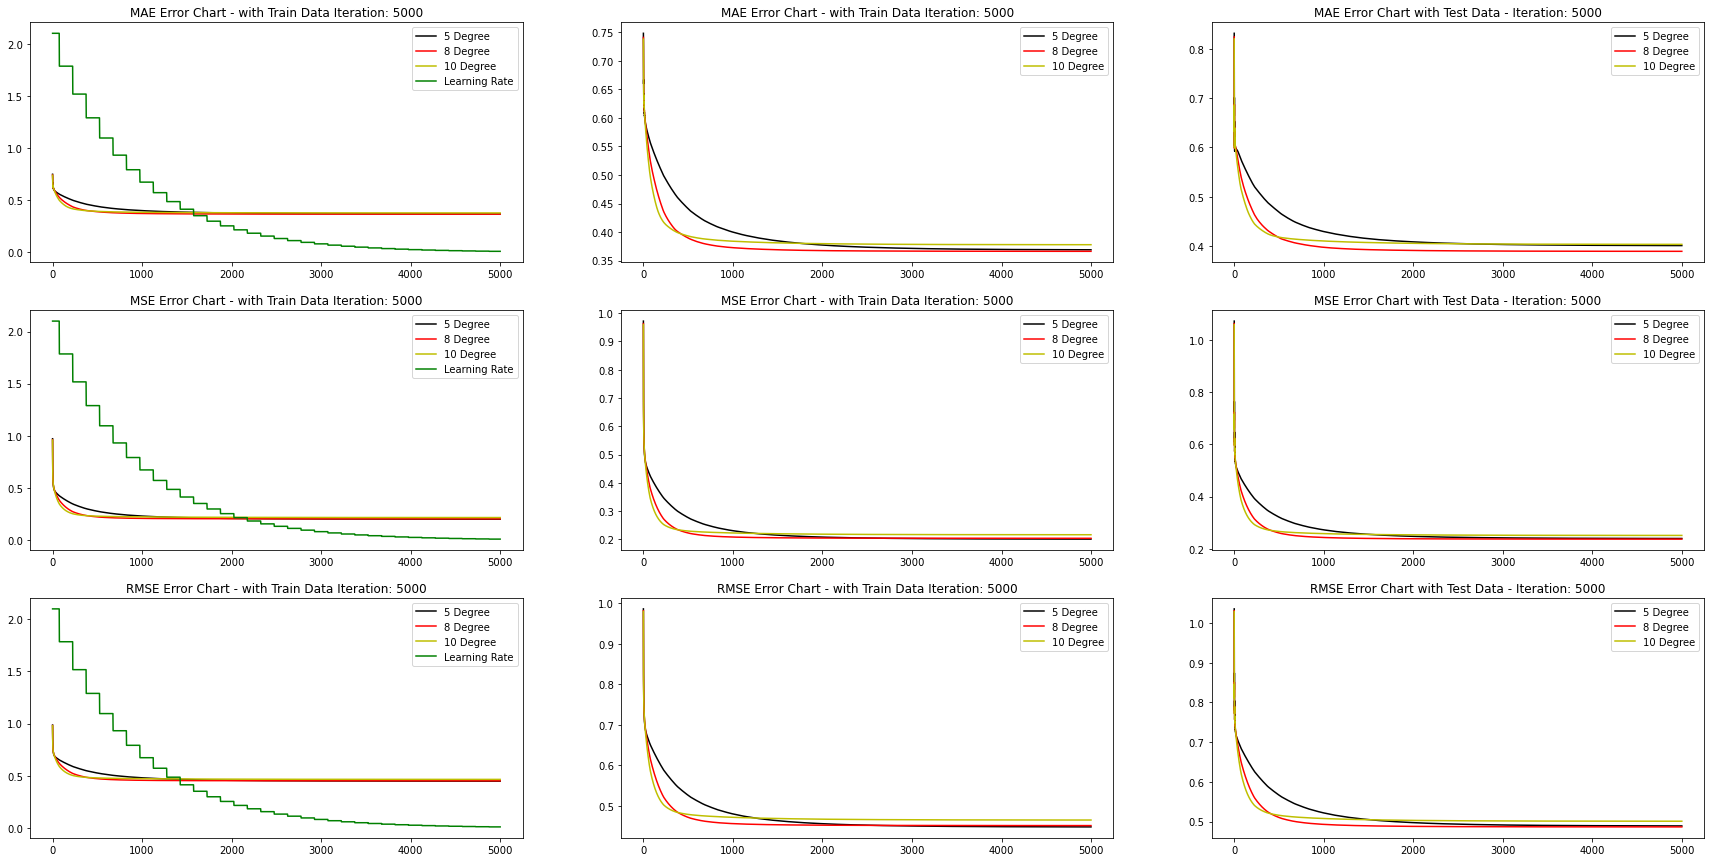

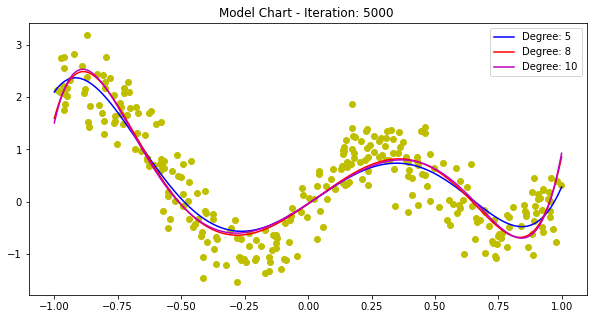

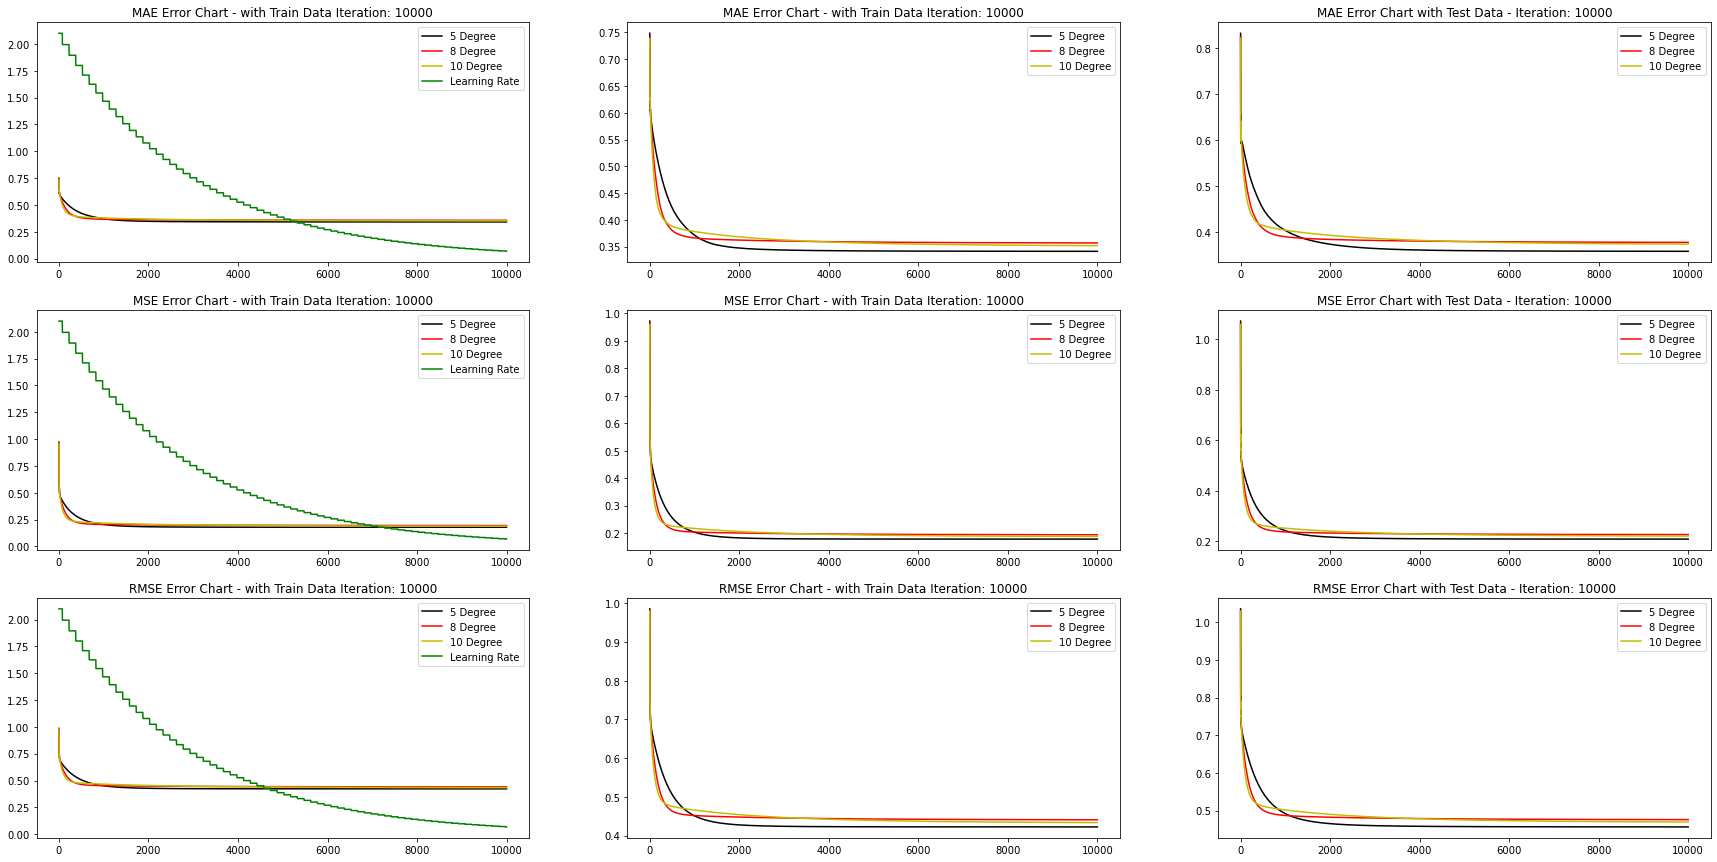

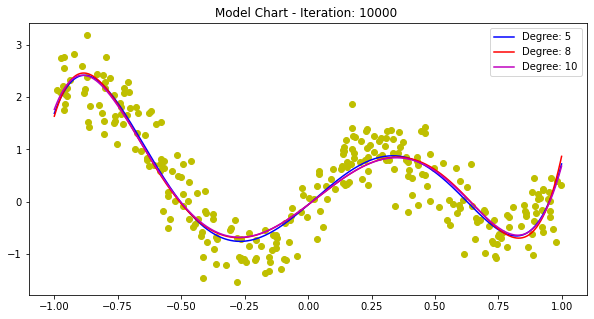

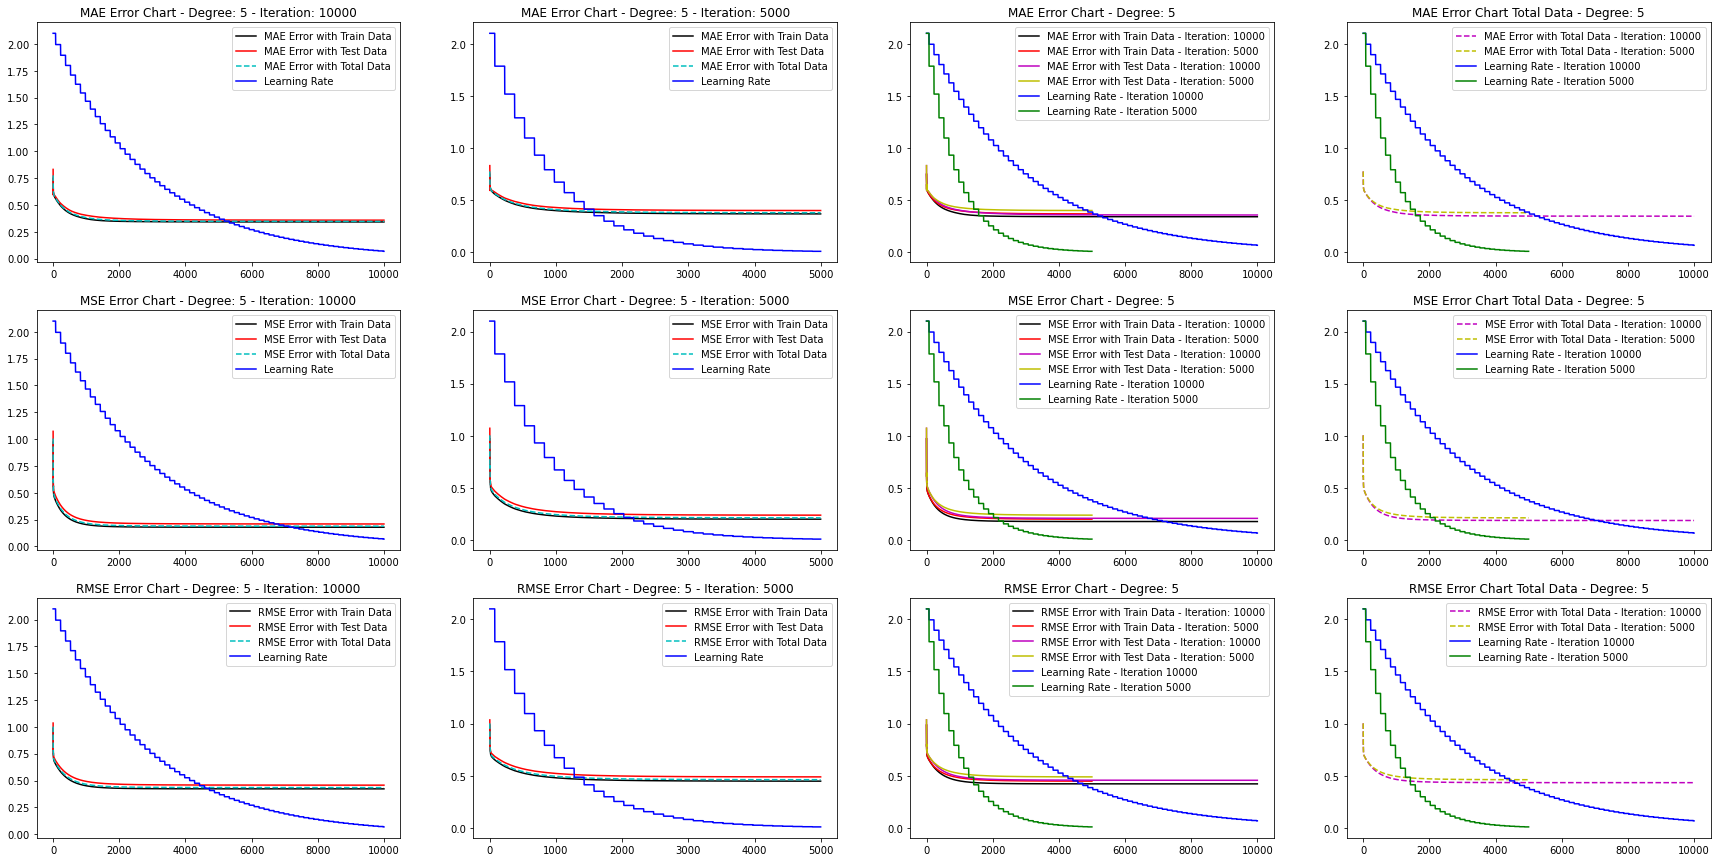

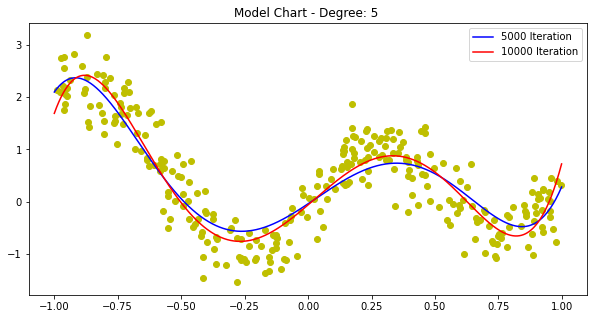

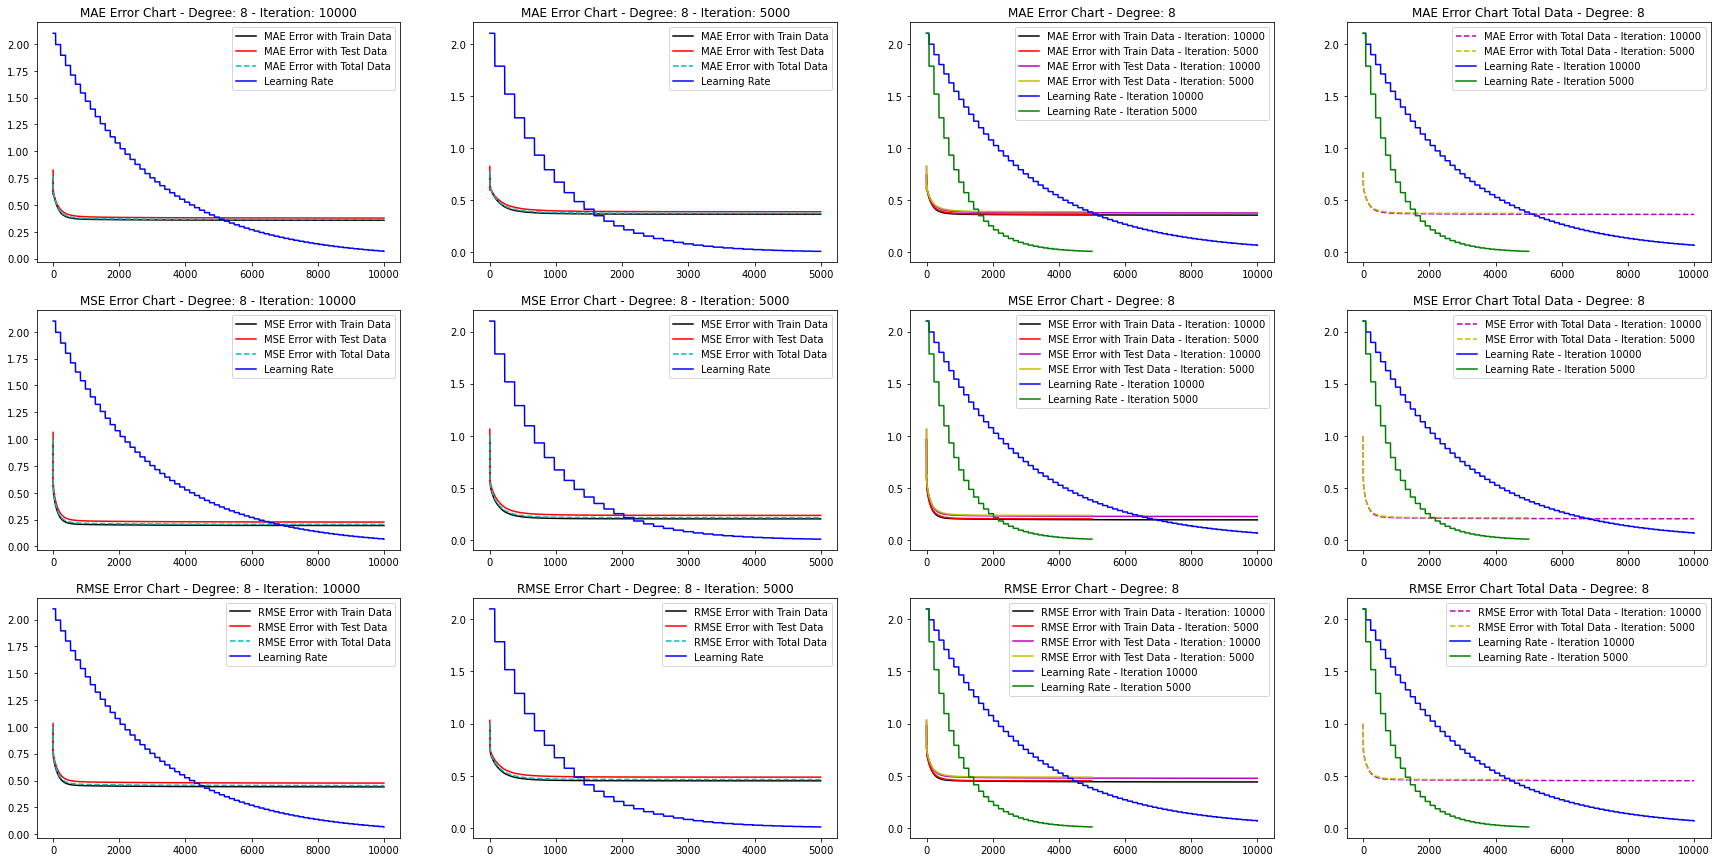

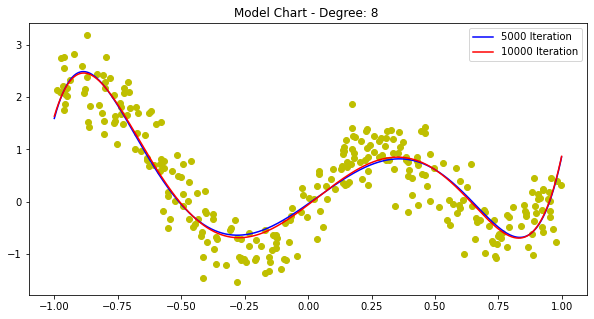

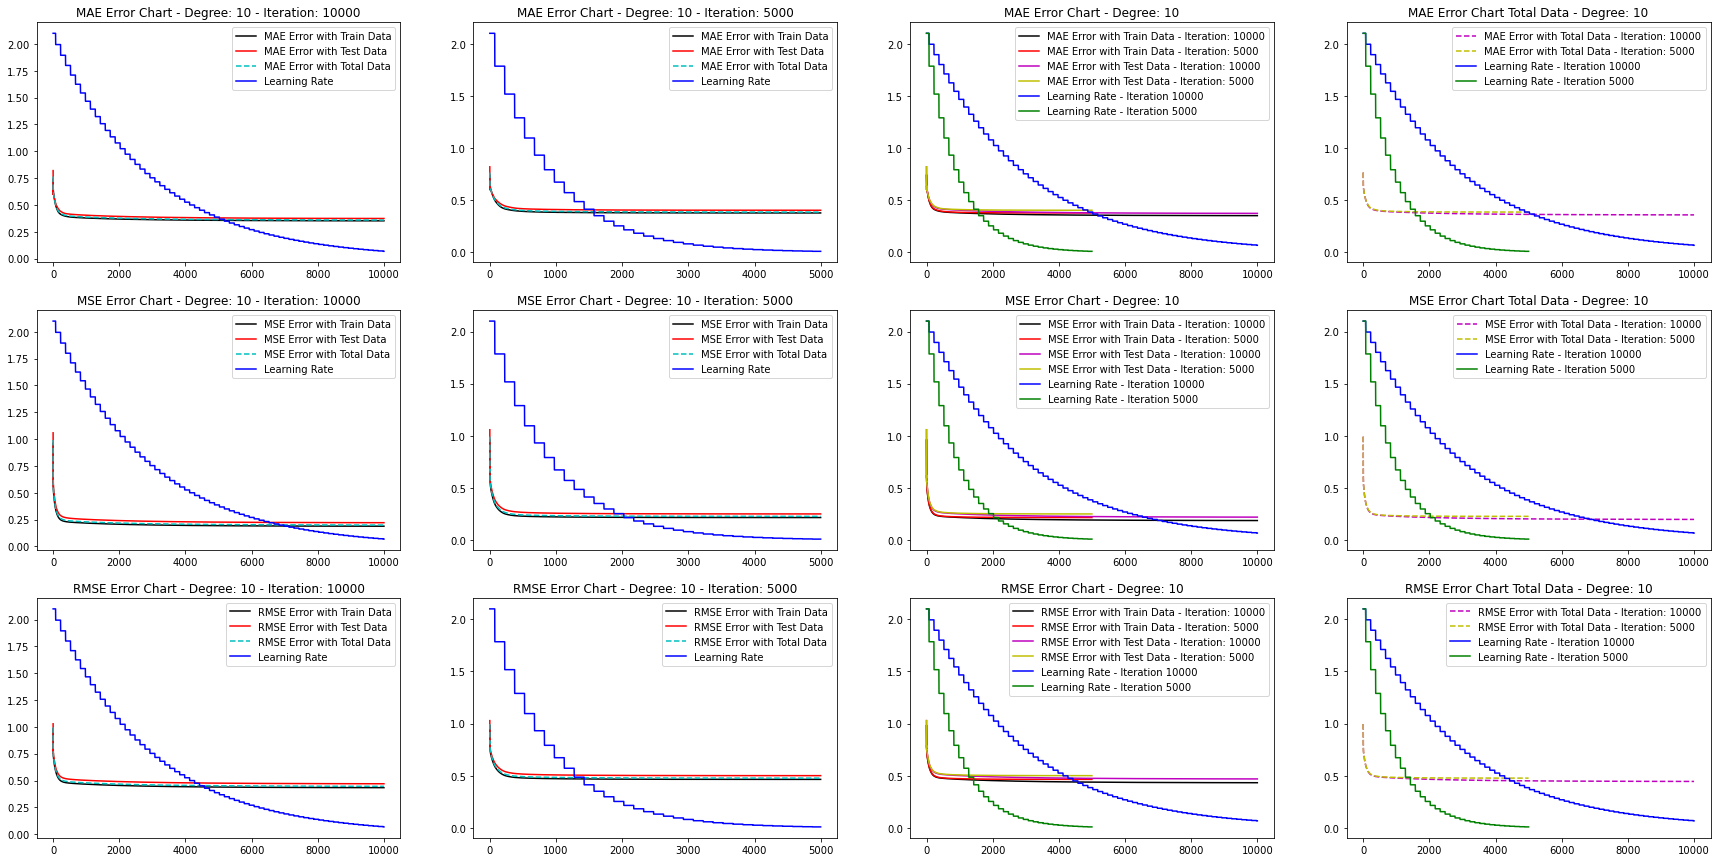

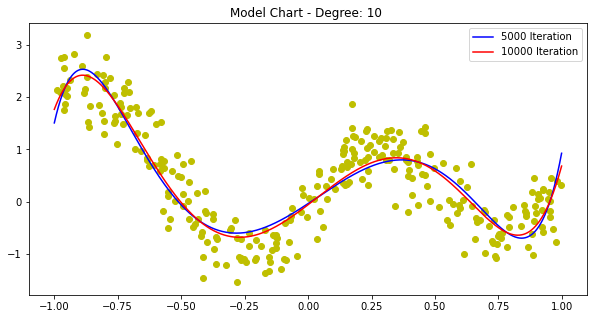

In [11]:
for i in range(2):
    ErrorGraphByDegreeIteration(RESULTS_GDs[i],RESULTS_GDs[i+2],RESULTS_GDs[i+4])
    ModelGraphByIteration(RESULTS_GDs[i],RESULTS_GDs[i+2],RESULTS_GDs[i+4])

for i in range(5):
    ErrorAndLearningRateGraphByDegree(RESULTS_GDs[i],RESULTS_GDs[i+1])
    ModelGraphByDegree(RESULTS_GDs[i],RESULTS_GDs[i+1])



In [12]:
# تابع زیر برای تبدیل یک ویژگی به تعداد درجه مد نظر تا ویژگی استفاده می شود
# به عنوان مثال اگر میخواهیم درجه ما پنج باشد باید شش جمله داشته باشیم که هر کدام توان های ویژگی ما باشد
def GenerateDegreeData(x_temp, Degree):
    Count = len(x_temp)
    x_temp_copy = x_temp.copy()
    x_temp =  np.array([x_temp,]) 
    
    # اضافه کردن یک ستون 1 به ازای توان صفر هر مقدار
    x_ones = np.ones((Count,1))
    x_temp = np.reshape(x_temp,(Count,1))
    x_temp = np.append(x_ones,x_temp,axis=1) 
    
    # اضافه کردن سایر ستون ها به غیر از توان صفر و یک
    for i in range(2,Degree+1):
        x_temp = np.reshape(x_temp,(Count,i))
        x_temp = np.insert(x_temp, i, [tmp**i for tmp in x_temp_copy], axis=1)
        
    return x_temp

# تابع فرض ما
def HypothesisMultivariate(X, Theta):
    results=[]
    for i in range(len(X)):
        summation = 0
        for j in range(len(Theta)):
            summation+= (Theta[j])*(X[i])**j
        results.append(summation)
    return results
    
# تابع معادله نرمال به ازای رابطه زیر:
# Theta = {(X^(T)X)^(-1)}{(X^(T)Y)}
def NormalEquation(X,Y):
    
    x_transpose = np.transpose(X)
    x_transpose_dot_x = x_transpose.dot(X)
    
    part_1 = np.linalg.inv(x_transpose_dot_x)#(محاسبه آکولاد اول فرمول معادله نرمال)
    part_2 = x_transpose.dot(Y) # (محاسبه آکولاد دوم فرمول معادله نرمال)
    Theta = part_1.dot(part_2) # ضرب داخلی دو پرانتز فرمول و حاصل شدن مقادیر تتا
    
    return Theta

# تابع معادله نرمال به ازای رابطه زیر با ضریب لاندا:
# Theta = {(X^(T)X+landaI)^(-1)}{(X^(T)Y)}
def NormalEquationWithLambda(X,Y,landa):
    
    x_transpose = np.transpose(X)
    x_transpose_dot_x = x_transpose.dot(X)
    
    Size = x_transpose_dot_x.shape[0]
    w = np.identity(Size)*landa
    
    x_transpose_dot_x += w
    
    part_1 = np.linalg.inv(x_transpose_dot_x)#(محاسبه آکولاد اول فرمول معادله نرمال)
    part_2 = x_transpose.dot(Y) # (محاسبه آکولاد دوم فرمول معادله نرمال)
    Theta = part_1.dot(part_2) # ضرب داخلی دو پرانتز فرمول و حاصل شدن مقادیر تتا
    
    return Theta


In [13]:
RESULTS_NEs.clear()
for deg in DEGREES:
    X = GenerateDegreeData(x_train.copy(),deg)
    Y = y_train.copy()
    RESULTS_NEs.append([list(NormalEquation(X,Y)),deg])
    

In [14]:
def CompareModels(Thetas_NEs,GDs):
    
    plt.rcParams["figure.figsize"] = (20,10)
    
    PlottingRange = list(np.arange(-1,1,0.001))
    
    
    for i in range(len(Thetas_NEs)):
        I = 1
        for j in range(len(GDs)):
            plt.subplot(2,3, I)
            plt.plot(X_Total,Y_Total,'co')
            plt.plot(PlottingRange,HypothesisMultivariate(PlottingRange,Thetas_NEs[i][0]),'m-',label="NE - Degree: {0}".format(Thetas_NEs[i][1]))
            plt.plot(PlottingRange,HypothesisMultivariate(PlottingRange,GDs[j][2]),'r-',label="GD Degree: {0} - Iteration: {1}".format(GDs[j][0],GDs[j][1]))
            plt.title("Model Chart Comparison")
            plt.legend()
            I+=1
        plt.show()

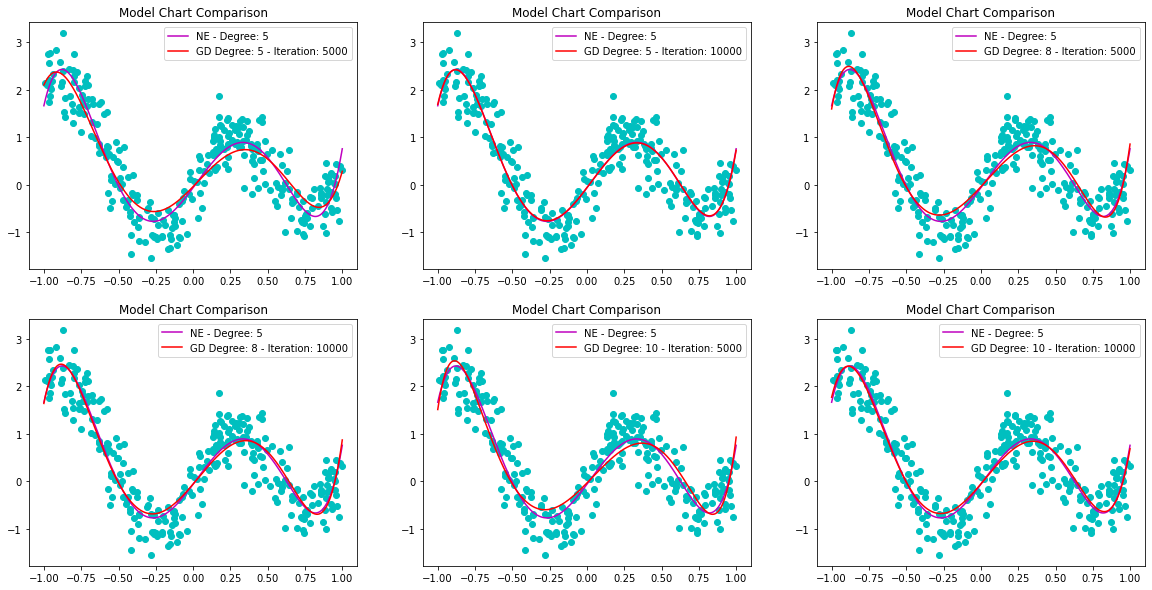

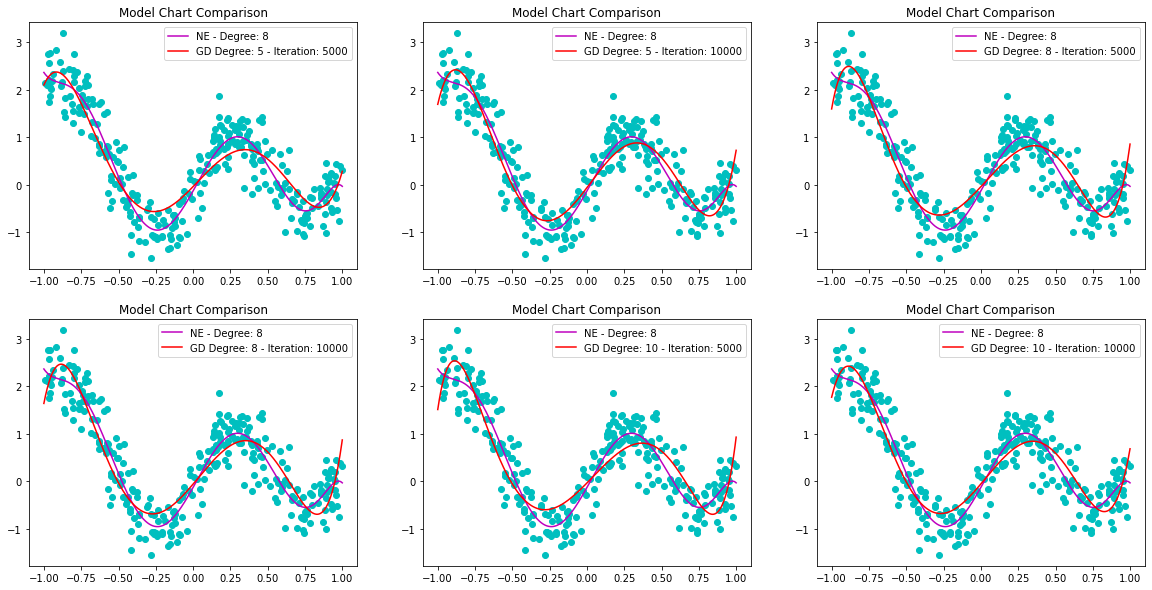

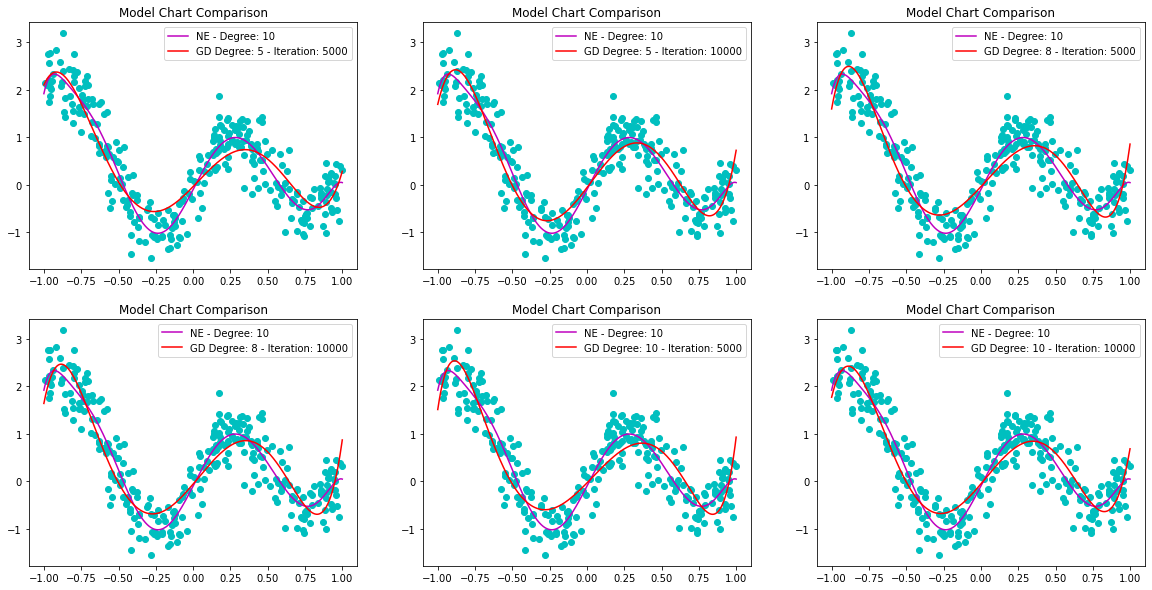

In [15]:
CompareModels(RESULTS_NEs,RESULTS_GDs)

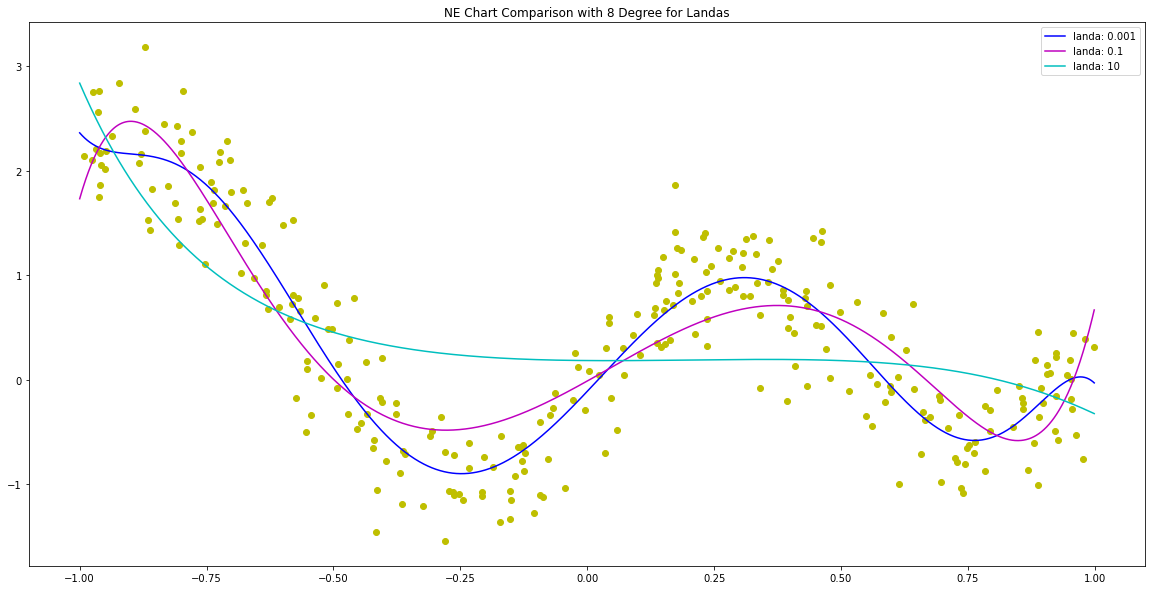

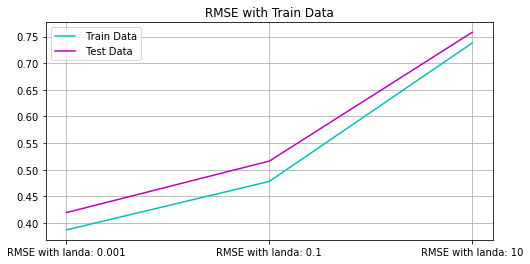

In [16]:
def RMSE(X,Y,Theta):
    mse = 0
    Predicts = HypothesisMultivariate(X,Theta)
    for index in range(len(X)):
        mse += (Predicts[index] - Y[index])**2
    mse /= len(X)
    rmse = sqrt(mse)
    return rmse
    
def LandaAnalysis():
    LANDAs = (0.001,0.1,10)  
    NEs = []
    RMSEs = []
    for l in LANDAs :
        X = GenerateDegreeData(x_train.copy(),deg)
        Y = y_train.copy()
        NEs.append(NormalEquationWithLambda(X,Y,l))
        
    plt.plot(X_Total,Y_Total,'yo')
    plt.rcParams["figure.figsize"] = (8,4)
    PlottingRange = list(np.arange(-1,1,0.001))
    plt.plot(PlottingRange,HypothesisMultivariate(PlottingRange,NEs[0]),'b-',label='landa: {0}'.format(LANDAs[0]))
    plt.plot(PlottingRange,HypothesisMultivariate(PlottingRange,NEs[1]),'m-',label='landa: {0}'.format(LANDAs[1]))
    plt.plot(PlottingRange,HypothesisMultivariate(PlottingRange,NEs[2]),'c-',label='landa: {0}'.format(LANDAs[2]))
    plt.title("NE Chart Comparison with 8 Degree for Landas")
    plt.legend()
    plt.show()
    
    
    plt.rcParams["figure.figsize"] = (8,4)
    rmse_label = ['RMSE with landa: {0}'.format(LANDAs[0]), 'RMSE with landa: {0}'.format(LANDAs[1]), 'RMSE with landa: {0}'.format(LANDAs[2])]
    rmse_train = [RMSE(x_train,y_train,NEs[0]),RMSE(x_train,y_train,NEs[1]),RMSE(x_train,y_train,NEs[2])]
    rmse_test = [RMSE(x_test,y_test,NEs[0]),RMSE(x_test,y_test,NEs[1]),RMSE(x_test,y_test,NEs[2])]
    
    plt.plot(rmse_label,rmse_train,'c-',label=' Train Data')
    plt.plot(rmse_label,rmse_test,'m-',label=' Test Data')
    plt.title("RMSE with Train Data")
    plt.grid()
    plt.legend()
    plt.show()
    

    
    
LandaAnalysis()